<a href="https://colab.research.google.com/github/Shadiiiin/Covid-19-Death-Medical-Analysis-Visualization-/blob/main/Learner_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Covid-19 Pre-existing Medical Condition Analysis using Plotly Express, Choropleth maps and WordCloud Text Visualization

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

##Task 1 : Importing all the necessary libraries

In [4]:
import pandas as pd       #Data analysis and Manipulation
import plotly.express as px    #Data Visualization (one line of code for one graph)
import matplotlib.pyplot as plt   #Data Visualization for WordCloud
from wordcloud import WordCloud   #Wordcloud Text Visualization


In [5]:
import plotly.io as pio
pio.renderers.default = 'colab'     # To initialize plotly (default mode of plotly if OFF as it consumes a lot of space)

##Task 2 : Importing the dataset and Visualizing it (Dataset 1 : Worldometer dataset)

In [6]:
from google.colab import files
files.upload()

Saving covid_worldometer_data.csv to covid_worldometer_data.csv


{'covid_worldometer_data.csv': b'S.no,Country,TotalCases,TotalDeaths,Total Recovered,Active cases,Totalcases/1M,TotalDeath/1M,iso_alpha\n1,USA,"23,848,410","397,994","14,112,119","9,338,297","71,822","1,199",USA\n2,India,"10,528,508","151,954","10,162,738","213,816","7,589",110,IND\n3,Brazil,"8,326,115","207,160","7,339,703","779,252","39,021",971,BRA\n4,Russia,"3,495,816","63,940","2,882,044","549,832","23,949",438,RUS\n5,UK,"3,260,258","86,015","1,406,967","1,767,276","47,890","1,263",UKR\n6,France,"2,851,670","69,313","206,802","2,575,555","43,636","1,061",FRA\n7,Turkey,"2,364,801","23,495","2,236,938","104,368","27,878",277,TUR\n8,Italy,"2,336,279","80,848","1,694,051","561,380","38,671","1,338",ITA\n9,Spain,"2,211,967","53,079",,,"47,300","1,135",ESP\n10,Germany,"2,004,011","45,492","1,641,200","317,319","23,878",542,DEU\n11,Colombia,"1,849,101","47,491","1,683,835","117,775","36,133",928,COL\n12,Argentina,"1,770,715","45,125","1,549,490","176,100","38,986",994,ARG\n13,Mexico,"1,5

In [7]:
df=pd.read_csv("covid_worldometer_data.csv")

In [8]:
df

,S.no,Country,TotalCases,TotalDeaths,Total Recovered,Active cases,Totalcases/1M,TotalDeath/1M,iso_alpha
0,1,USA,"23,848,410","397,994","14,112,119","9,338,297","71,822","1,199",USA
1,2,India,"10,528,508","151,954","10,162,738","213,816","7,589",110,IND
2,3,Brazil,"8,326,115","207,160","7,339,703","779,252","39,021",971,BRA
3,4,Russia,"3,495,816","63,940","2,882,044","549,832","23,949",438,RUS
4,5,UK,"3,260,258","86,015","1,406,967","1,767,276","47,890","1,263",UKR
...,...,...,...,...,...,...,...,...,...
216,217,Wallis and Futuna,4,,1,3,359,NaN,WLF
217,218,Samoa,2,,2,0,10,NaN,WSM
218,219,Micronesia,1,,NaN,1,9,NaN,FSM
219,220,Vanuatu,1,,1,0,3,NaN,VUT


In [9]:
px.bar(df.head(15), x="Country",y='TotalCases',color='Country')

In [10]:
px.bar(df.head(15), x="Country",y='TotalDeaths',color='Country')

In [11]:
df.columns


Index(['S.no', 'Country', 'TotalCases', 'TotalDeaths', 'Total Recovered',
       'Active cases', 'Totalcases/1M', 'TotalDeath/1M', 'iso_alpha'],
      dtype='object')

In [12]:
px.scatter(df,x='Totalcases/1M',y='TotalDeath/1M',color='Country')

##Task 3: Geographic Visualization using Choropleth maps

In [ ]:
# A choropleth map displays divided geographical areas or regions that are coloured, shaded or patterned in relation to a data variable.
#Amazing Representation of data in a map . Choropleth maps provide an easy way to visualize how a measurement varies across a geographic area.

#Dataset 1
#parameters= dataset, locations= ISOALPHA, color, hover_name, color_continuous_scale= [RdYlGn, Blues, Viridis...],
#

In [13]:
df.columns



Index(['S.no', 'Country', 'TotalCases', 'TotalDeaths', 'Total Recovered',
       'Active cases', 'Totalcases/1M', 'TotalDeath/1M', 'iso_alpha'],
      dtype='object')

In [14]:
px.choropleth(df, locations='iso_alpha', hover_name='Country',
               color='TotalDeath/1M',projection='orthographic',
               color_continuous_scale='Viridis')

In [15]:
px.choropleth(df, locations='iso_alpha', hover_name='Country',
               color='TotalDeath/1M',projection='equirectangular',
               color_continuous_scale='Plasma')

In [16]:
px.choropleth(df, locations='iso_alpha', hover_name='Country',
               color='TotalDeath/1M',scope='asia',
               color_continuous_scale='Viridis')

##Task 4: Importing and Analyzing the dataset(Dataset 2: Covid-19 Pre-existing condition Medical dataset; source: CDC,US)

In [17]:
from google.colab import files
files.upload()

Saving US_medical_data.csv to US_medical_data.csv


{'US_medical_data.csv': b'Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag\r\n1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,198,205,\r\n1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,968,985,\r\n1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,2537,2584,\r\n1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,7369,7555,\r\n1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,18378,18829,\r\n1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,65-74,32164,32832,\r\n1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,75-84,39163,39762,\r\n1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,85+,38650,39008,\r\n1/10/2021,1/4

In [18]:
df1=pd.read_csv('US_medical_data.csv')

In [19]:
df1

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,198.0,205.0,NaN
1,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,968.0,985.0,NaN
2,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,2537.0,2584.0,NaN
3,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,7369.0,7555.0,NaN
4,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,18378.0,18829.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12415,1/10/2021,1/4/2020,1/9/2021,PR,COVID-19,COVID-19,U071,65-74,321.0,321.0,NaN
12416,1/10/2021,1/4/2020,1/9/2021,PR,COVID-19,COVID-19,U071,75-84,366.0,366.0,NaN
12417,1/10/2021,1/4/2020,1/9/2021,PR,COVID-19,COVID-19,U071,85+,264.0,264.0,NaN
12418,1/10/2021,1/4/2020,1/9/2021,PR,COVID-19,COVID-19,U071,Not stated,0.0,0.0,NaN


In [20]:
df1.groupby(['State']).count()

,Data as of,Start Week,End Week,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
State,,,,,,,,,,
AK,230,230,230,230,230,230,230,128,128,102
AL,230,230,230,230,230,230,230,186,189,44
AR,230,230,230,230,230,230,230,185,186,45
AZ,230,230,230,230,230,230,230,195,197,35
CA,230,230,230,230,230,230,230,209,210,21
CO,230,230,230,230,230,230,230,178,181,52
CT,230,230,230,230,230,230,230,181,183,49
DC,230,230,230,230,230,230,230,164,165,66
DE,230,230,230,230,230,230,230,140,142,90


##Task 5: Visualizing the Pre-existing condition Medical dataset

In [21]:
df1.groupby(['Condition Group']).count()

,Data as of,Start Week,End Week,State,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
Condition Group,,,,,,,,,,
All other conditions and causes (residual),540,540,540,540,540,540,540,460,485,80
Alzheimer disease,540,540,540,540,540,540,540,459,459,81
COVID-19,540,540,540,540,540,540,540,481,481,59
Circulatory diseases,3780,3780,3780,3780,3780,3780,3780,2889,2897,891
Diabetes,540,540,540,540,540,540,540,437,437,103
"Intentional and unintentional injury, poisoning, and other adverse events",540,540,540,540,540,540,540,353,412,187
Malignant neoplasms,540,540,540,540,540,540,540,394,398,146
Obesity,540,540,540,540,540,540,540,372,372,168
Renal failure,540,540,540,540,540,540,540,420,422,120


In [22]:
df1.groupby(['Condition']).count()

,Data as of,Start Week,End Week,State,Condition Group,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
Condition,,,,,,,,,,
Adult respiratory distress syndrome,540,540,540,540,540,540,540,423,423,117
All other conditions and causes (residual),540,540,540,540,540,540,540,460,485,80
Alzheimer disease,540,540,540,540,540,540,540,459,459,81
COVID-19,540,540,540,540,540,540,540,481,481,59
Cardiac arrest,540,540,540,540,540,540,540,418,418,122
Cardiac arrhythmia,540,540,540,540,540,540,540,403,403,137
Cerebrovascular diseases,540,540,540,540,540,540,540,406,406,134
Chronic lower respiratory diseases,540,540,540,540,540,540,540,422,423,118
Diabetes,540,540,540,540,540,540,540,437,437,103


In [23]:
df1.groupby(['Age Group']).count()

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,COVID-19 Deaths,Number of Mentions,Flag
Age Group,,,,,,,,,,
0-24,1242,1242,1242,1242,1242,1242,1242,804,812,438
25-34,1242,1242,1242,1242,1242,1242,1242,654,670,588
35-44,1242,1242,1242,1242,1242,1242,1242,679,700,563
45-54,1242,1242,1242,1242,1242,1242,1242,816,837,426
55-64,1242,1242,1242,1242,1242,1242,1242,960,971,282
65-74,1242,1242,1242,1242,1242,1242,1242,1081,1092,161
75-84,1242,1242,1242,1242,1242,1242,1242,1126,1131,116
85+,1242,1242,1242,1242,1242,1242,1242,1101,1108,141
All Ages,1242,1242,1242,1242,1242,1242,1242,1203,1206,39


In [24]:
filter1=df1[(df1['State']=='US')]

In [25]:
px.bar(df1,x='Age Group',y='COVID-19 Deaths',color='Condition',hover_name='Condition',log_y=True)

In [26]:
px.bar(filter1,x='Age Group',y='COVID-19 Deaths',color='Condition',hover_name='Condition')

In [27]:
filter2= df1[(df1['State']=='US')&(df1['Age Group']=='All Ages')]

In [28]:
filter2.columns

Index(['Data as of', 'Start Week', 'End Week', 'State', 'Condition Group',
       'Condition', 'ICD10_codes', 'Age Group', 'COVID-19 Deaths',
       'Number of Mentions', 'Flag'],
      dtype='object')

In [29]:
px.bar(filter2,x='Condition Group', y='COVID-19 Deaths', color='COVID-19 Deaths', hover_name='Condition')

In [30]:
filter3= df1[(df1['Condition']=='Influenza and pneumonia')& (df1['Age Group']=='All Ages')]

In [31]:
filter3


,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
9,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,139430.0,141763.0,NaN
239,1/10/2021,1/4/2020,1/9/2021,AL,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,1734.0,1755.0,NaN
469,1/10/2021,1/4/2020,1/9/2021,AK,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,86.0,90.0,NaN
699,1/10/2021,1/4/2020,1/9/2021,AZ,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,4171.0,4239.0,NaN
929,1/10/2021,1/4/2020,1/9/2021,AR,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,1393.0,1408.0,NaN
1159,1/10/2021,1/4/2020,1/9/2021,CA,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,13016.0,13118.0,NaN
1389,1/10/2021,1/4/2020,1/9/2021,CO,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,1872.0,1914.0,NaN
1619,1/10/2021,1/4/2020,1/9/2021,CT,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,1107.0,1127.0,NaN
1849,1/10/2021,1/4/2020,1/9/2021,DE,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,297.0,304.0,NaN
2079,1/10/2021,1/4/2020,1/9/2021,DC,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,773.0,773.0,NaN


In [32]:
px.bar(filter3, x='State', y='COVID-19 Deaths', color='State',log_y=True)


##Task 6: WordCloud Text Visualization

In [ ]:
#Step a= Convert the columns with conditions and condition group into list using tolist() function
#Step b= Convert the list to one single string
#Step c= Convert the string into WordCloud
# WordCloud imported in task 1. # WordCloud visualization needs matplotlib

###WordCloud 1- Condition group

In [33]:
df1

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,198.0,205.0,NaN
1,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,968.0,985.0,NaN
2,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,2537.0,2584.0,NaN
3,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,7369.0,7555.0,NaN
4,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,18378.0,18829.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12415,1/10/2021,1/4/2020,1/9/2021,PR,COVID-19,COVID-19,U071,65-74,321.0,321.0,NaN
12416,1/10/2021,1/4/2020,1/9/2021,PR,COVID-19,COVID-19,U071,75-84,366.0,366.0,NaN
12417,1/10/2021,1/4/2020,1/9/2021,PR,COVID-19,COVID-19,U071,85+,264.0,264.0,NaN
12418,1/10/2021,1/4/2020,1/9/2021,PR,COVID-19,COVID-19,U071,Not stated,0.0,0.0,NaN


In [34]:
filter2


,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
9,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,139430.0,141763.0,NaN
19,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Chronic lower respiratory diseases,J40-J47,All Ages,28359.0,29326.0,NaN
29,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Adult respiratory distress syndrome,J80,All Ages,36915.0,36915.0,NaN
39,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Respiratory failure,J96,All Ages,114543.0,117102.0,NaN
49,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Respiratory arrest,R09.2,All Ages,6727.0,6727.0,NaN
59,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Other diseases of the respiratory system,"J00-J06, J20-J39, J60-J70, J81-J86, J90-J95, J...",All Ages,11885.0,12352.0,NaN
69,1/10/2021,1/4/2020,1/9/2021,US,Circulatory diseases,Hypertensive diseases,I10-I15,All Ages,65095.0,65600.0,NaN
79,1/10/2021,1/4/2020,1/9/2021,US,Circulatory diseases,Ischemic heart disease,I20-I25,All Ages,34943.0,36863.0,NaN
89,1/10/2021,1/4/2020,1/9/2021,US,Circulatory diseases,Cardiac arrest,I46,All Ages,36430.0,36434.0,NaN
99,1/10/2021,1/4/2020,1/9/2021,US,Circulatory diseases,Cardiac arrhythmia,"I44, I45, I47-I49",All Ages,21919.0,22378.0,NaN


In [43]:
list1= filter2['Condition Group'].tolist()

In [44]:
string1="".join(list1)

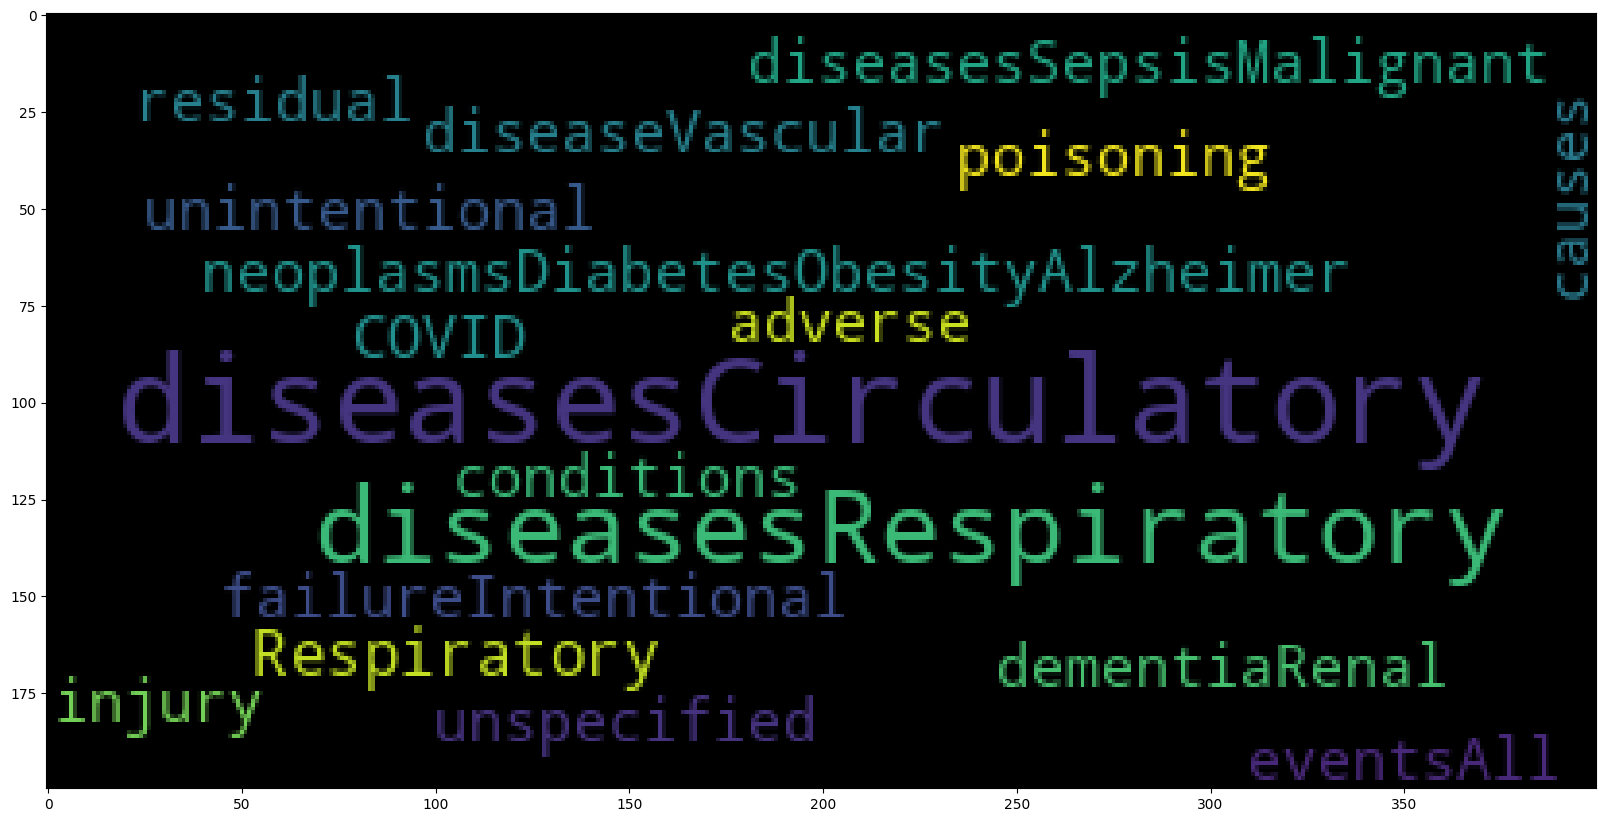

In [45]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(string1))

###WordCloud 2- Conditions

In [46]:
list2= filter2['Condition'].tolist()

In [47]:
string2="".join(list2)

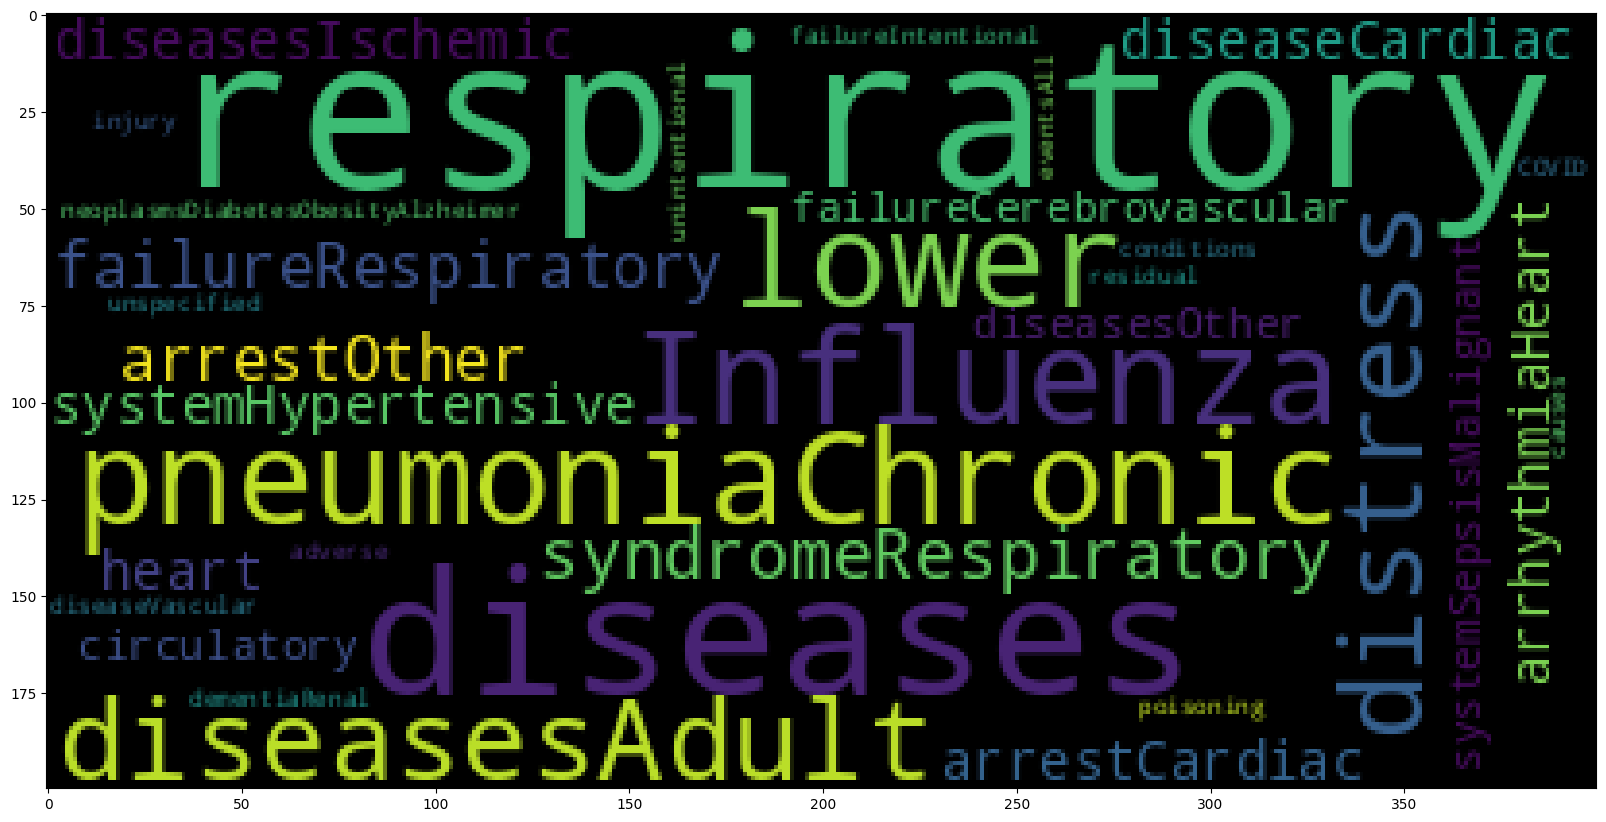

In [48]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(string2))